<a href="https://colab.research.google.com/github/lochansharma2535-glitch/deep_learning/blob/main/deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

X shape: (100, 1)
y shape: (100, 1)
W1 shape: (1, 10)
b1 shape: (1, 10)
W2 shape: (10, 1)
b2 shape: (1, 1)
Epoch 0, Loss: 0.693061
Epoch 100, Loss: 0.691292
Epoch 200, Loss: 0.691235
Epoch 300, Loss: 0.691154
Epoch 400, Loss: 0.691029
Epoch 500, Loss: 0.690826
Epoch 600, Loss: 0.690485
Epoch 700, Loss: 0.689897
Epoch 800, Loss: 0.688860
Epoch 900, Loss: 0.687007

Training completed! Final Loss: 0.683708


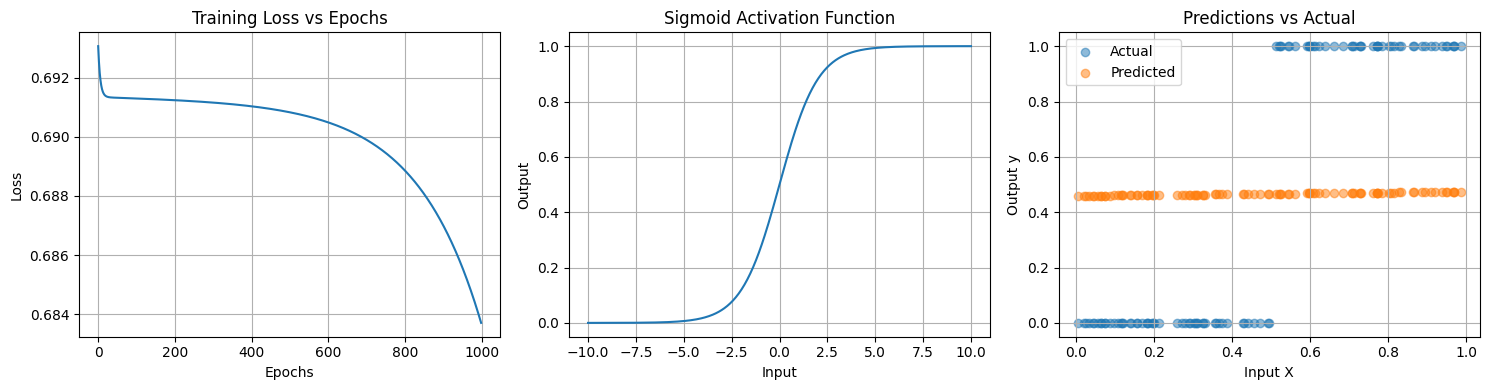


Test input: 0.20
Raw output: -0.1528
Predicted probability: 0.4619
Class prediction (threshold 0.5): 0

Test input: 0.60
Raw output: -0.1289
Predicted probability: 0.4678
Class prediction (threshold 0.5): 0

Test input: 0.80
Raw output: -0.1169
Predicted probability: 0.4708
Class prediction (threshold 0.5): 0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ==================== STEP 2: ACTIVATION FUNCTIONS ====================
def sigmoid(x):
    """Sigmoid activation function (0 to 1)"""
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """Derivative of sigmoid function"""
    return x * (1 - x)  # This is CORRECT if x is already sigmoid output

# ==================== STEP 3: INITIALIZE DATASET ====================
# Problem 1: Choose a problem that matches sigmoid (0-1 outputs)
# Linear: y = 2*X doesn't work well with sigmoid

# BETTER: Binary classification or scaled regression
np.random.seed(42)
X = np.random.rand(100, 1)   # 100 samples, 1 feature
# For binary classification (works with sigmoid):
y = (X > 0.5).astype(float)  # 1 if X > 0.5, else 0

print("X shape:", X.shape)
print("y shape:", y.shape)

# ==================== STEP 4: INITIALIZE NETWORK ====================
input_size = 1
hidden_size = 10
output_size = 1

# Initialize weights
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))  # Use zeros, not random
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

print(f"W1 shape: {W1.shape}")
print(f"b1 shape: {b1.shape}")
print(f"W2 shape: {W2.shape}")
print(f"b2 shape: {b2.shape}")

# ==================== STEP 5-9: TRAINING LOOP ====================
learning_rate = 0.1  # Increased for faster learning
epochs = 1000
losses = []

for epoch in range(epochs):
    # ---------- FORWARD PASS ----------
    # Hidden layer
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)

    # Output layer (WITH sigmoid for binary classification)
    z2 = np.dot(a1, W2) + b2
    y_pred = sigmoid(z2)  # ✅ FIXED: Added sigmoid

    # ---------- LOSS CALCULATION ----------
    # Binary Cross-Entropy loss (better for classification)
    m = X.shape[0]
    loss = -(1/m) * np.sum(y * np.log(y_pred + 1e-8) + (1-y) * np.log(1-y_pred + 1e-8))
    losses.append(loss)

    # ---------- BACKPROPAGATION ----------
    # Output layer error
    d_output = (y_pred - y) / m  # Derivative of binary cross-entropy

    # Gradient for output layer
    dW2 = np.dot(a1.T, d_output)
    db2 = np.sum(d_output, axis=0, keepdims=True)

    # Hidden layer error
    error_hidden = np.dot(d_output, W2.T)
    d_hidden = error_hidden * sigmoid_derivative(a1)  # ✅ CORRECT

    # Gradient for hidden layer
    dW1 = np.dot(X.T, d_hidden)
    db1 = np.sum(d_hidden, axis=0, keepdims=True)

    # ---------- UPDATE WEIGHTS ----------
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.6f}")

print(f"\nTraining completed! Final Loss: {loss:.6f}")

# ==================== STEP 10: VISUALIZE RESULTS ====================
# 1. Loss vs Epochs
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(range(epochs), losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Epochs")
plt.grid(True)

# 2. Sigmoid activation function
plt.subplot(1, 3, 2)
x_vals = np.linspace(-10, 10, 400)
y_sigmoid = sigmoid(x_vals)
plt.plot(x_vals, y_sigmoid)
plt.xlabel("Input")
plt.ylabel("Output")
plt.title("Sigmoid Activation Function")
plt.grid(True)

# 3. Predictions vs Actual
plt.subplot(1, 3, 3)
plt.scatter(X, y, alpha=0.5, label='Actual')
plt.scatter(X, y_pred, alpha=0.5, label='Predicted')
plt.xlabel("Input X")
plt.ylabel("Output y")
plt.title("Predictions vs Actual")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# ==================== STEP 11: TEST THE MODEL ====================
X_test = np.array([[0.2], [0.6], [0.8]])

for test_input in X_test:
    # Forward pass for test
    z1_test = np.dot(test_input.reshape(1, -1), W1) + b1
    a1_test = sigmoid(z1_test)
    z2_test = np.dot(a1_test, W2) + b2
    y_test_pred = sigmoid(z2_test)

    print(f"\nTest input: {test_input[0]:.2f}")
    print(f"Raw output: {z2_test[0,0]:.4f}")
    print(f"Predicted probability: {y_test_pred[0,0]:.4f}")
    print(f"Class prediction (threshold 0.5): {1 if y_test_pred[0,0] > 0.5 else 0}")